In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Example: Read a CSV file
import pandas as pd

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/data/index_1.csv'
data = pd.read_csv(file_path)

# Display the data
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
file_path = '/content/drive/MyDrive/data/index_2.csv'
df_cash = pd.read_csv(file_path)
df_cash.head()

,date,datetime,cash_type,money,coffee_name
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk


In [5]:
df_all = pd.concat([df_cash, data], ignore_index=True)
df_all.head()

,date,datetime,cash_type,money,coffee_name,card
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea,NaN
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea,NaN
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso,NaN
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee,NaN
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk,NaN


In [6]:
df_all.tail()

,date,datetime,cash_type,money,coffee_name,card
3893,2025-03-23,2025-03-23 10:34:54.894,card,35.76,Cappuccino,ANON-0000-0000-1158
3894,2025-03-23,2025-03-23 14:43:37.362,card,35.76,Cocoa,ANON-0000-0000-1315
3895,2025-03-23,2025-03-23 14:44:16.864,card,35.76,Cocoa,ANON-0000-0000-1315
3896,2025-03-23,2025-03-23 15:47:28.723,card,25.96,Americano,ANON-0000-0000-1316
3897,2025-03-23,2025-03-23 18:11:38.635,card,35.76,Latte,ANON-0000-0000-1275


In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   money        3898 non-null   float64
 4   coffee_name  3898 non-null   object 
 5   card         3547 non-null   object 
dtypes: float64(1), object(5)
memory usage: 182.8+ KB


In [8]:
print(df_all["cash_type"].unique())


['cash' 'card']


In [9]:
print(f"Is there missing(NaN/Na) data?-->{df_all.isnull().any().to_numpy().any()}")

Is there missing(NaN/Na) data?-->True


In [10]:
df_all.isnull().any()

,0
date,False
datetime,False
cash_type,False
money,False
coffee_name,False
card,True


In [11]:
nan_indx = [i for i in range(len(df_all)) if df_all["card"].isnull()[i]]
print(df_all["card"][nan_indx].unique(), "for", str(nan_indx[:5])[:-1],"..." )

[nan] for [0, 1, 2, 3, 4 ...


In [12]:
df_all = df_all.iloc[:,1:]
df_all.sample()

,datetime,cash_type,money,coffee_name,card
2330,2024-10-24 13:23:59.581,card,35.76,Cappuccino,ANON-0000-0000-0809


In [23]:
# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print(" "*15 + "SALES ANALYSIS & PREDICTION REPORT")
print("="*70)

# ============================================
# 1. DATA PREPARATION
# ============================================
print("\n📁 1. DATA PREPARATION")
print("-"*70)

# Ensure df_all exists and datetime is converted
df_all["datetime"] = pd.to_datetime(df_all["datetime"], format='mixed', errors='coerce')
df_all = df_all.sort_values(by="datetime").reset_index(drop=True)

# Add date columns
df_all['date'] = df_all['datetime'].dt.date
df_all['month'] = df_all['datetime'].dt.to_period('M')
df_all['day_name'] = df_all['datetime'].dt.day_name()
df_all['hour'] = df_all['datetime'].dt.hour

print(f"✓ Total Records: {len(df_all):,} transactions")
print(f"✓ Date Range: {df_all['datetime'].min()} to {df_all['datetime'].max()}")
print(f"✓ Total Revenue: $ {df_all['money'].sum():,.0f}")
print(f"✓ Average Transaction Value: $ {df_all['money'].mean():,.0f}")


               SALES ANALYSIS & PREDICTION REPORT

📁 1. DATA PREPARATION
----------------------------------------------------------------------
✓ Total Records: 3,898 transactions
✓ Date Range: 2024-03-01 10:15:50.520000 to 2025-03-23 21:23:11
✓ Total Revenue: $ 122,322
✓ Average Transaction Value: $ 31



📊 2. DAILY SALES ANALYSIS
----------------------------------------------------------------------

📈 Key Metrics:
   • Average Daily Sales: $ 321
   • Average Transactions/Day: 10
   • Highest Sales Day: $ 979
   • Lowest Sales Day: $ 23
   • Standard Deviation: $ 184

🏆 Best Performance: 2025-02-21 - $ 979
⚠️  Lowest Performance: 2024-08-29 - $ 23


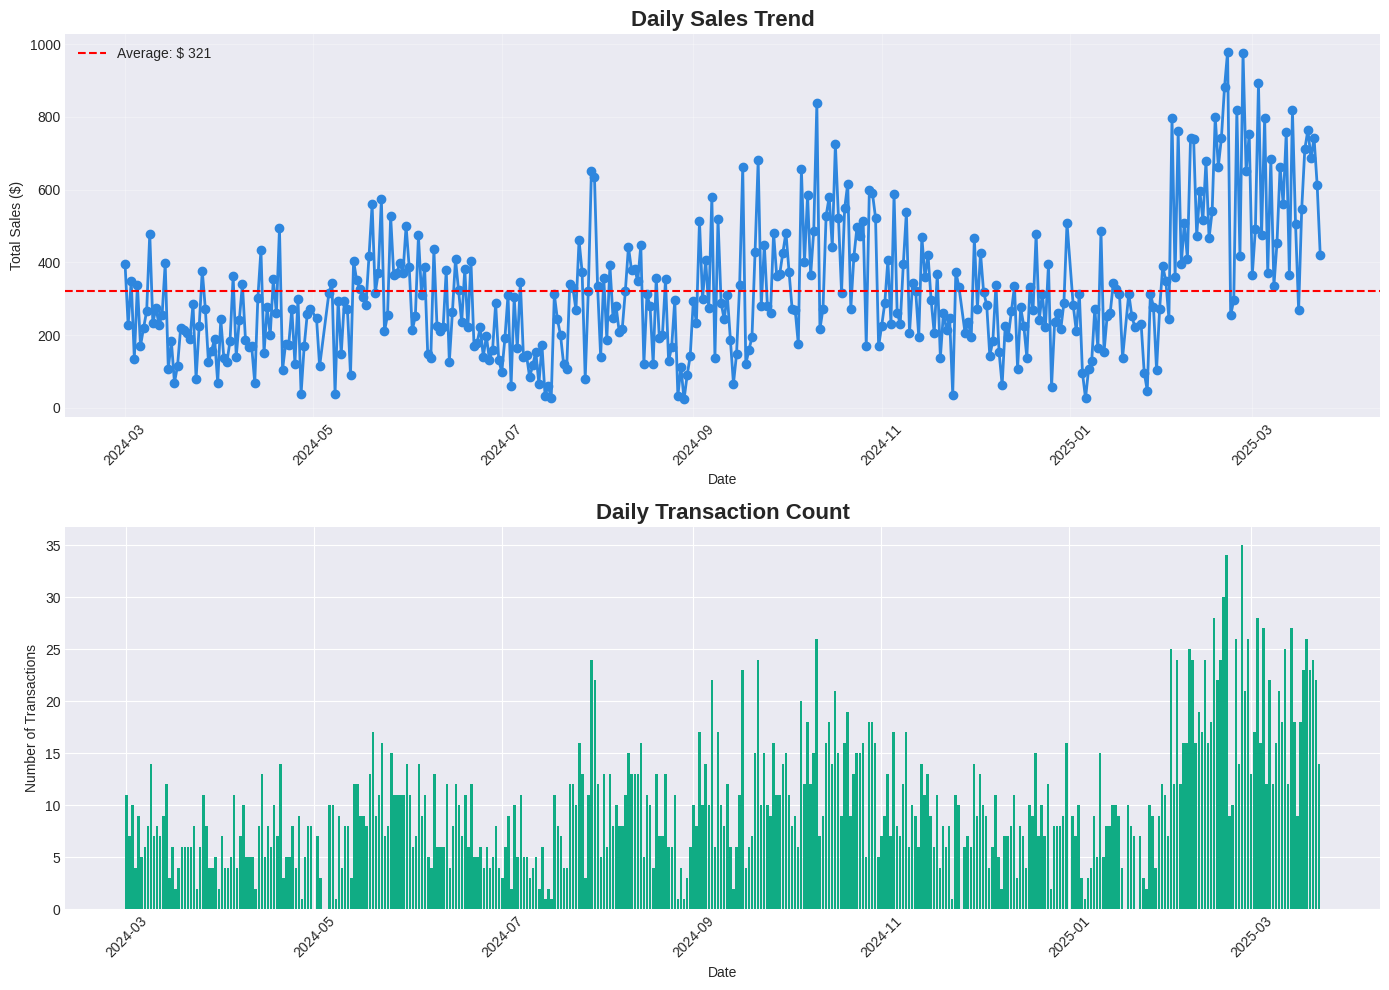

In [24]:
# ============================================
# 2. DAILY SALES ANALYSIS
# ============================================
print("\n" + "="*70)
print("📊 2. DAILY SALES ANALYSIS")
print("-"*70)

daily_sales = df_all.groupby('date').agg({
    'money': ['sum', 'mean', 'count']
}).round(0)
daily_sales.columns = ['total_sales', 'avg_transaction', 'num_transactions']

print(f"\n📈 Key Metrics:")
print(f"   • Average Daily Sales: $ {daily_sales['total_sales'].mean():,.0f}")
print(f"   • Average Transactions/Day: {daily_sales['num_transactions'].mean():.0f}")
print(f"   • Highest Sales Day: $ {daily_sales['total_sales'].max():,.0f}")
print(f"   • Lowest Sales Day: $ {daily_sales['total_sales'].min():,.0f}")
print(f"   • Standard Deviation: $ {daily_sales['total_sales'].std():,.0f}")

# Best and worst days
best_day = daily_sales['total_sales'].idxmax()
worst_day = daily_sales['total_sales'].idxmin()
print(f"\n🏆 Best Performance: {best_day} - $ {daily_sales.loc[best_day, 'total_sales']:,.0f}")
print(f"⚠️  Lowest Performance: {worst_day} - $ {daily_sales.loc[worst_day, 'total_sales']:,.0f}")

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].plot(daily_sales.index, daily_sales['total_sales'], marker='o', linewidth=2, color='#2E86DE')
axes[0].axhline(y=daily_sales['total_sales'].mean(), color='red', linestyle='--',
                label=f'Average: $ {daily_sales["total_sales"].mean():,.0f}')
axes[0].set_title('Daily Sales Trend', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Sales ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(daily_sales.index, daily_sales['num_transactions'], color='#10AC84')
axes[1].set_title('Daily Transaction Count', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Transactions')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


🥤 3. FAVORITE PRODUCTS ANALYSIS
----------------------------------------------------------------------

🏆 TOP 10 BEST-SELLING PRODUCTS:
                    Total_Revenue Units_Sold Avg_Price Percentage
coffee_name                                                      
Americano with Milk       $25,269        824    $31.00     21.14%
Latte                     $28,658        806    $36.00     20.68%
Americano                 $15,437        593    $26.00     15.21%
Cappuccino                $18,514        517    $36.00     13.26%
Cortado                    $7,535        292    $26.00      7.49%
Hot Chocolate             $10,172        282    $36.00      7.23%
Cocoa                      $8,678        243    $36.00      6.23%
Espresso                   $3,187        152    $21.00      3.90%
Americano with milk        $1,100         44    $25.00      1.13%
Irish whiskey                $525         21    $25.00      0.54%

📊 Product Insights:
   • Total Unique Products: 34
   • Most Popular: 

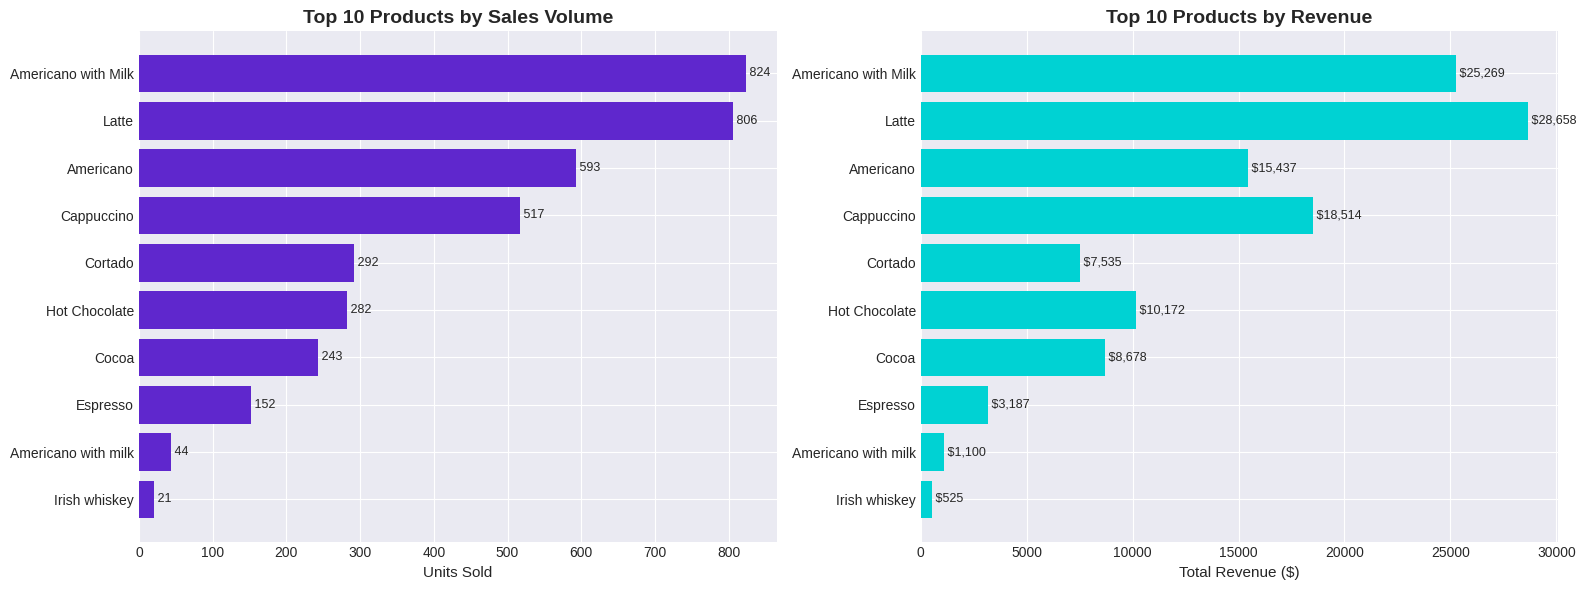


📈 PRODUCT PERFORMANCE CATEGORIES:
   ⭐ Star Products (High Volume + High Revenue): 9 products
      Top: Americano with Milk, Latte, Americano


In [27]:
# ============================================
# 3. FAVORITE PRODUCTS ANALYSIS (ENHANCED)
# ============================================
print("\n" + "="*70)
print("🥤 3. FAVORITE PRODUCTS ANALYSIS")
print("-"*70)

# Find product column with flexible naming
product_col = None
possible_names = ['coffee_name', 'coffe name', 'coffee name', 'product', 'drink', 'item', 'product_name', 'drink_name', 'menu']
for col in possible_names:
    if col in df_all.columns:
        product_col = col
        break

if product_col and 'money' in df_all.columns:
    try:
        # Clean product names (remove extra spaces, handle case)
        df_analysis = df_all.copy()
        df_analysis[product_col] = df_analysis[product_col].str.strip()

        # Group by product and calculate metrics
        favorite_products = df_analysis.groupby(product_col).agg({
            'money': ['sum', 'count', 'mean']
        })

        # Flatten column names
        favorite_products.columns = ['Total_Revenue', 'Units_Sold', 'Avg_Price']
        favorite_products = favorite_products.round(0)
        favorite_products = favorite_products.sort_values('Units_Sold', ascending=False)

        # Calculate percentage of total sales
        total_units = favorite_products['Units_Sold'].sum()
        favorite_products['Percentage'] = (favorite_products['Units_Sold'] / total_units * 100).round(2)

        # Display top 10 products
        print("\n🏆 TOP 10 BEST-SELLING PRODUCTS:")
        top_10_display = favorite_products.head(10).copy()
        top_10_display['Total_Revenue'] = top_10_display['Total_Revenue'].apply(lambda x: f"${x:,.0f}")
        top_10_display['Avg_Price'] = top_10_display['Avg_Price'].apply(lambda x: f"${x:,.2f}")
        top_10_display['Units_Sold'] = top_10_display['Units_Sold'].apply(lambda x: f"{x:,.0f}")
        top_10_display['Percentage'] = top_10_display['Percentage'].apply(lambda x: f"{x:.2f}%")
        print(top_10_display.to_string())

        # Key insights
        print(f"\n📊 Product Insights:")
        print(f"   • Total Unique Products: {len(favorite_products)}")
        print(f"   • Most Popular: {favorite_products.index[0]} ({favorite_products.iloc[0]['Units_Sold']:.0f} units, {favorite_products.iloc[0]['Percentage']:.1f}%)")

        top_revenue_product = favorite_products['Total_Revenue'].idxmax()
        top_revenue_value = favorite_products.loc[top_revenue_product, 'Total_Revenue']
        print(f"   • Highest Revenue Product: {top_revenue_product} (${top_revenue_value:,.0f})")

        highest_price_product = favorite_products['Avg_Price'].idxmax()
        highest_price_value = favorite_products.loc[highest_price_product, 'Avg_Price']
        print(f"   • Most Expensive Product: {highest_price_product} (${highest_price_value:,.2f})")

        # Calculate market concentration
        top_5_percentage = favorite_products.head(5)['Percentage'].sum()
        print(f"   • Top 5 Products Account for: {top_5_percentage:.1f}% of total sales")

        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        top_10 = favorite_products.head(10)

        # Chart 1: Units Sold
        bars1 = axes[0].barh(range(len(top_10)), top_10['Units_Sold'], color='#5F27CD')
        axes[0].set_yticks(range(len(top_10)))
        axes[0].set_yticklabels(top_10.index)
        axes[0].set_xlabel('Units Sold', fontsize=11)
        axes[0].set_title('Top 10 Products by Sales Volume', fontsize=14, fontweight='bold')
        axes[0].invert_yaxis()

        # Add value labels
        for i, (bar, val) in enumerate(zip(bars1, top_10['Units_Sold'])):
            axes[0].text(val, i, f' {int(val):,}', va='center', fontsize=9)

        # Chart 2: Revenue
        bars2 = axes[1].barh(range(len(top_10)), top_10['Total_Revenue'], color='#00D2D3')
        axes[1].set_yticks(range(len(top_10)))
        axes[1].set_yticklabels(top_10.index)
        axes[1].set_xlabel('Total Revenue ($)', fontsize=11)
        axes[1].set_title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
        axes[1].invert_yaxis()

        # Add value labels
        for i, (bar, val) in enumerate(zip(bars2, top_10['Total_Revenue'])):
            axes[1].text(val, i, f' ${int(val):,}', va='center', fontsize=9)

        plt.tight_layout()
        plt.show()

        # Additional: Product performance matrix
        print("\n📈 PRODUCT PERFORMANCE CATEGORIES:")
        high_volume_threshold = favorite_products['Units_Sold'].quantile(0.75)
        high_revenue_threshold = favorite_products['Total_Revenue'].quantile(0.75)

        stars = favorite_products[
            (favorite_products['Units_Sold'] >= high_volume_threshold) &
            (favorite_products['Total_Revenue'] >= high_revenue_threshold)
        ]
        print(f"   ⭐ Star Products (High Volume + High Revenue): {len(stars)} products")
        if len(stars) > 0:
            print(f"      Top: {', '.join(stars.head(3).index.tolist())}")

    except Exception as e:
        print(f"❌ Error in analysis: {str(e)}")
        print(f"   Available columns: {df_all.columns.tolist()}")

else:
    if product_col is None:
        print(f"⚠️  Product column not found in dataset!")
        print(f"   Available columns: {df_all.columns.tolist()}")
        print(f"   Looking for: {possible_names}")
    else:
        print("⚠️  'money' column not found in dataset!")
        print(f"   Available columns: {df_all.columns.tolist()}")


💳 4. PRICE vs PAYMENT TYPE ANALYSIS
----------------------------------------------------------------------

📊 PAYMENT TYPE STATISTICS:
          Avg_Transaction Median_Transaction Total_Revenue  Count Std_Dev
cash_type                                                                
card               $31.41             $32.82      $117,115  3,729   $4.96
cash               $30.81             $30.00        $5,207    169   $7.03

🔬 STATISTICAL ANALYSIS (comparing payment types):
   • T-Test Statistic: 1.4960
   • P-Value: 0.1347
   ✗ NO SIGNIFICANT DIFFERENCE between card and cash
     Transaction amounts are similar across payment types
   • Effect Size (Cohen's d): 0.0981
     Interpretation: Small effect

💡 KEY INSIGHTS:
   • Highest Avg Transaction: card ($31.41)
   • Lowest Avg Transaction: cash ($30.81)
   • Most Used Payment Method: card (3,729 transactions)
   • Revenue Leader: card ($117,115, 95.7%)


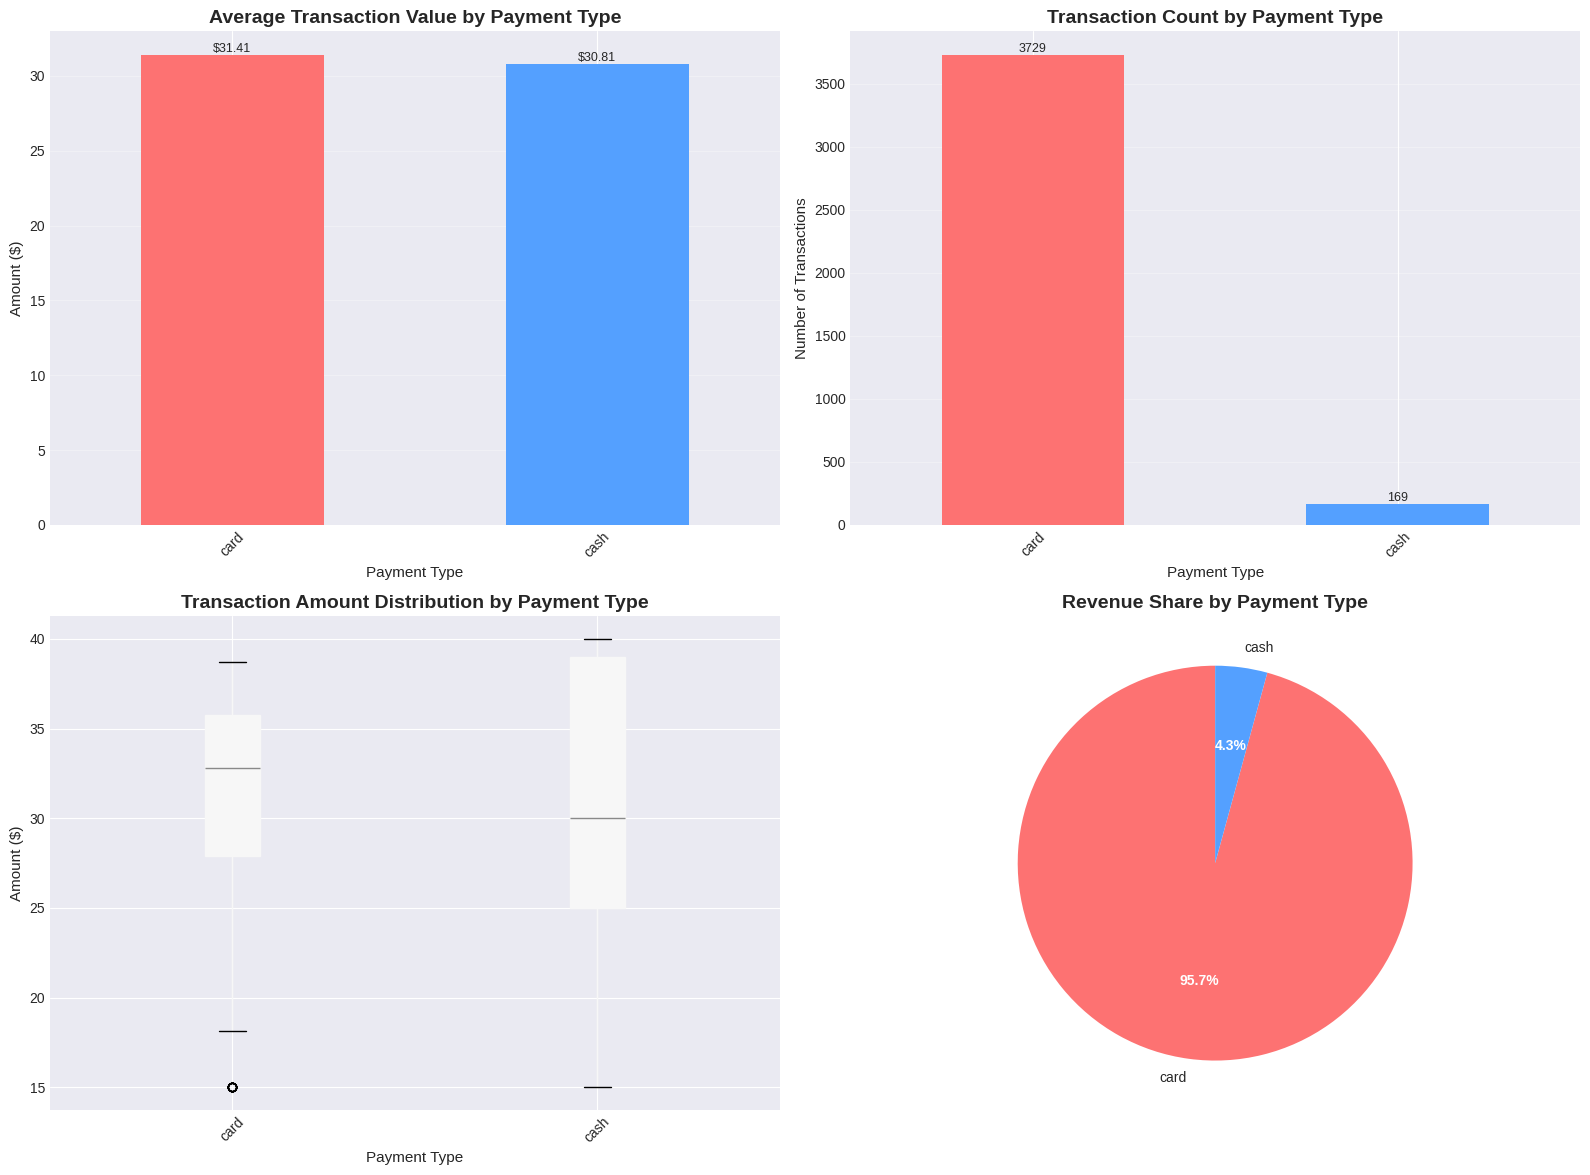

In [28]:
# ============================================
# 4. PRICE vs PAYMENT TYPE ANALYSIS
# ============================================
print("\n" + "="*70)
print("💳 4. PRICE vs PAYMENT TYPE ANALYSIS")
print("-"*70)

# Find payment column
payment_col = None
possible_payment_cols = ['cash_type', 'payment', 'payment_type', 'pay_type', 'payment_method', 'type']
for col in possible_payment_cols:
    if col in df_all.columns:
        payment_col = col
        break

if payment_col and 'money' in df_all.columns:
    try:
        # Clean payment type data
        df_analysis = df_all.copy()
        df_analysis[payment_col] = df_analysis[payment_col].str.strip()

        # Remove any null values
        df_analysis = df_analysis.dropna(subset=[payment_col, 'money'])

        # Group by payment type
        payment_analysis = df_analysis.groupby(payment_col).agg({
            'money': ['mean', 'median', 'sum', 'count', 'std']
        })
        payment_analysis.columns = ['Avg_Transaction', 'Median_Transaction', 'Total_Revenue', 'Count', 'Std_Dev']
        payment_analysis = payment_analysis.round(2)

        print("\n📊 PAYMENT TYPE STATISTICS:")
        display_table = payment_analysis.copy()
        display_table['Avg_Transaction'] = display_table['Avg_Transaction'].apply(lambda x: f"${x:,.2f}")
        display_table['Median_Transaction'] = display_table['Median_Transaction'].apply(lambda x: f"${x:,.2f}")
        display_table['Total_Revenue'] = display_table['Total_Revenue'].apply(lambda x: f"${x:,.0f}")
        display_table['Count'] = display_table['Count'].apply(lambda x: f"{int(x):,}")
        display_table['Std_Dev'] = display_table['Std_Dev'].apply(lambda x: f"${x:,.2f}")
        print(display_table.to_string())

        # Statistical test for significant difference
        payment_types = df_analysis[payment_col].unique()
        if len(payment_types) >= 2:
            print(f"\n🔬 STATISTICAL ANALYSIS (comparing payment types):")
            groups = [df_analysis[df_analysis[payment_col] == pt]['money'].values for pt in payment_types]

            if len(payment_types) == 2:
                from scipy import stats
                t_stat, p_value = stats.ttest_ind(groups[0], groups[1])
                print(f"   • T-Test Statistic: {t_stat:.4f}")
                print(f"   • P-Value: {p_value:.4f}")

                if p_value < 0.05:
                    print(f"   ✓ SIGNIFICANT DIFFERENCE detected between {payment_types[0]} and {payment_types[1]}")
                    print(f"     There is a statistically significant difference in transaction amounts")
                else:
                    print(f"   ✗ NO SIGNIFICANT DIFFERENCE between {payment_types[0]} and {payment_types[1]}")
                    print(f"     Transaction amounts are similar across payment types")

                # Effect size (Cohen's d for 2 groups)
                mean1, mean2 = groups[0].mean(), groups[1].mean()
                std1, std2 = groups[0].std(), groups[1].std()
                pooled_std = np.sqrt((std1**2 + std2**2) / 2)
                cohens_d = (mean1 - mean2) / pooled_std
                print(f"   • Effect Size (Cohen's d): {abs(cohens_d):.4f}")

                if abs(cohens_d) < 0.2:
                    effect_interpretation = "Small effect"
                elif abs(cohens_d) < 0.5:
                    effect_interpretation = "Medium effect"
                else:
                    effect_interpretation = "Large effect"
                print(f"     Interpretation: {effect_interpretation}")

            else:
                from scipy import stats
                f_stat, p_value = stats.f_oneway(*groups)
                print(f"   • ANOVA F-Statistic: {f_stat:.4f}")
                print(f"   • P-Value: {p_value:.4f}")

                if p_value < 0.05:
                    print(f"   ✓ SIGNIFICANT DIFFERENCE detected among payment types")
                    print(f"     At least one payment type has significantly different transaction amounts")
                else:
                    print(f"   ✗ NO SIGNIFICANT DIFFERENCE among payment types")
                    print(f"     Transaction amounts are similar across all payment types")

        # Additional insights
        print(f"\n💡 KEY INSIGHTS:")
        highest_avg = payment_analysis['Avg_Transaction'].idxmax()
        lowest_avg = payment_analysis['Avg_Transaction'].idxmin()
        print(f"   • Highest Avg Transaction: {highest_avg} (${payment_analysis.loc[highest_avg, 'Avg_Transaction']:,.2f})")
        print(f"   • Lowest Avg Transaction: {lowest_avg} (${payment_analysis.loc[lowest_avg, 'Avg_Transaction']:,.2f})")

        most_used = payment_analysis['Count'].idxmax()
        print(f"   • Most Used Payment Method: {most_used} ({int(payment_analysis.loc[most_used, 'Count']):,} transactions)")

        revenue_leader = payment_analysis['Total_Revenue'].idxmax()
        revenue_percentage = (payment_analysis.loc[revenue_leader, 'Total_Revenue'] / payment_analysis['Total_Revenue'].sum() * 100)
        print(f"   • Revenue Leader: {revenue_leader} (${payment_analysis.loc[revenue_leader, 'Total_Revenue']:,.0f}, {revenue_percentage:.1f}%)")

        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # Chart 1: Average transaction by payment type
        colors = ['#FD7272', '#54A0FF', '#48DBFB', '#FF9FF3']
        bars1 = payment_analysis['Avg_Transaction'].plot(kind='bar', ax=axes[0, 0], color=colors[:len(payment_analysis)])
        axes[0, 0].set_title('Average Transaction Value by Payment Type', fontsize=14, fontweight='bold')
        axes[0, 0].set_ylabel('Amount ($)', fontsize=11)
        axes[0, 0].set_xlabel('Payment Type', fontsize=11)
        axes[0, 0].tick_params(axis='x', rotation=45)
        axes[0, 0].grid(True, alpha=0.3, axis='y')

        # Add value labels
        for container in axes[0, 0].containers:
            axes[0, 0].bar_label(container, fmt='$%.2f', fontsize=9)

        # Chart 2: Transaction count by payment type
        bars2 = payment_analysis['Count'].plot(kind='bar', ax=axes[0, 1], color=colors[:len(payment_analysis)])
        axes[0, 1].set_title('Transaction Count by Payment Type', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('Number of Transactions', fontsize=11)
        axes[0, 1].set_xlabel('Payment Type', fontsize=11)
        axes[0, 1].tick_params(axis='x', rotation=45)
        axes[0, 1].grid(True, alpha=0.3, axis='y')

        # Add value labels
        for container in axes[0, 1].containers:
            axes[0, 1].bar_label(container, fmt='%d', fontsize=9)

        # Chart 3: Box plot for distribution
        df_analysis.boxplot(column='money', by=payment_col, ax=axes[1, 0], patch_artist=True)
        axes[1, 0].set_title('Transaction Amount Distribution by Payment Type', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Payment Type', fontsize=11)
        axes[1, 0].set_ylabel('Amount ($)', fontsize=11)
        axes[1, 0].get_figure().suptitle('')  # Remove default title
        plt.sca(axes[1, 0])
        plt.xticks(rotation=45)

        # Chart 4: Revenue share
        revenue_share = payment_analysis['Total_Revenue']
        wedges, texts, autotexts = axes[1, 1].pie(
            revenue_share,
            labels=revenue_share.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors[:len(payment_analysis)]
        )
        axes[1, 1].set_title('Revenue Share by Payment Type', fontsize=14, fontweight='bold')

        # Improve text readability
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontsize(10)
            autotext.set_fontweight('bold')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error in analysis: {str(e)}")
        print(f"   Available columns: {df_all.columns.tolist()}")
        import traceback
        print(traceback.format_exc())

else:
    if payment_col is None:
        print(f"⚠️  Payment type column not found in dataset!")
        print(f"   Available columns: {df_all.columns.tolist()}")
        print(f"   Looking for: {possible_payment_cols}")
    else:
        print("⚠️  'money' column not found in dataset!")
        print(f"   Available columns: {df_all.columns.tolist()}")


💳 5. FAVORITE CREDIT CARD ANALYSIS (by Type Only)
----------------------------------------------------------------------

💳 CREDIT CARD TYPE STATISTICS:
                 Total_Revenue  Transactions  Avg_Amount  Market_Share_%
card_type_clean                                                         
Anon                  112246.0          3547        32.0           100.0

📊 Insights:
   • Most Used Card Type: Anon (3547 transactions)
   • Market Leader Share: 100.0%
   • Total Credit Card Transactions: 3547


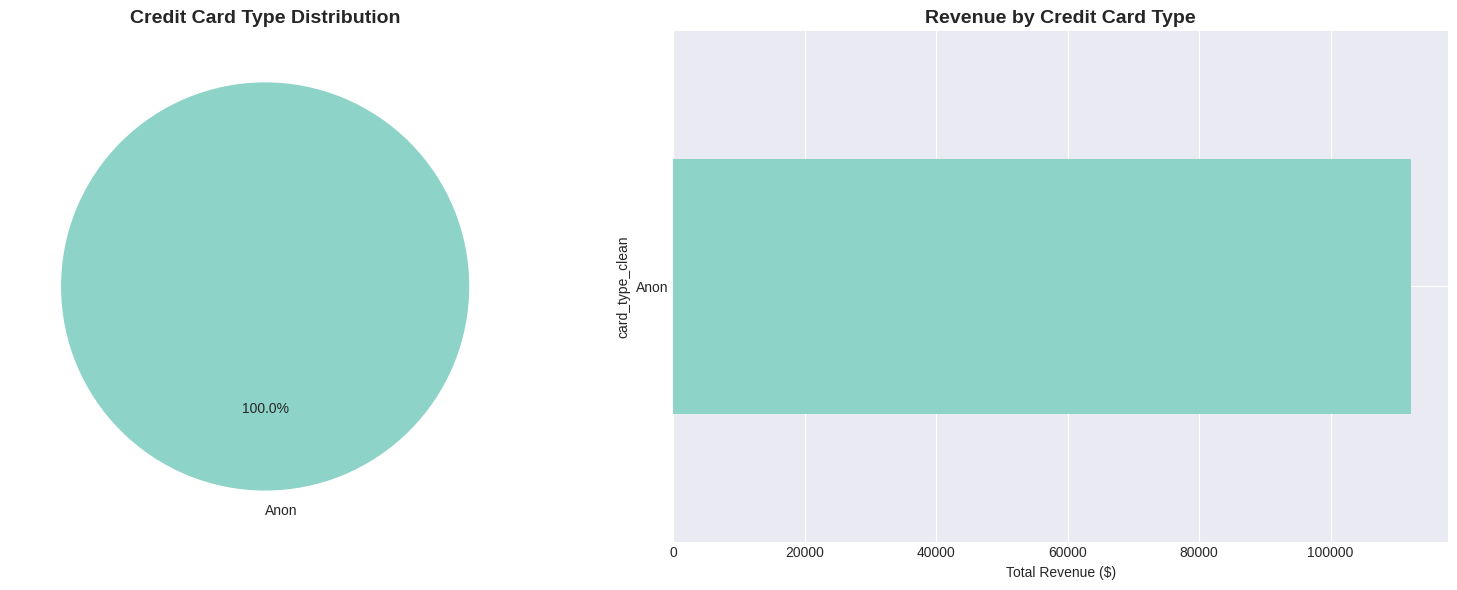

In [30]:
# ============================================
# 5. FAVORITE CREDIT CARD ANALYSIS (by Type Only)
# ============================================
print("\n" + "="*70)
print("💳 5. FAVORITE CREDIT CARD ANALYSIS (by Type Only)")
print("-"*70)

# Find card column
card_col = None
for col in ['card', 'card_type', 'cc', 'credit_card', 'cc_type']:
    if col in df_all.columns:
        card_col = col
        break

if card_col:
    cc_data = df_all[df_all[card_col].notna()].copy()

    # Ambil hanya jenis kartu (4 huruf pertama atau teks sebelum "-")
    cc_data['card_type_clean'] = (
        cc_data[card_col]
        .astype(str)
        .str.lower()
        .str.extract(r'^([a-zA-Z]+?)(?:-|_|[0-9]|$)')[0]  # ambil huruf depan sebelum angka atau simbol
        .str[:4]  # ambil maksimal 4 huruf pertama
        .str.title()
    )

    # Hapus nilai kosong
    cc_data = cc_data[cc_data['card_type_clean'].notna() & (cc_data['card_type_clean'] != '')]

    # Analisis agregat per jenis kartu
    cc_analysis = cc_data.groupby('card_type_clean').agg({
        'money': ['sum', 'count', 'mean']
    }).round(0)
    cc_analysis.columns = ['Total_Revenue', 'Transactions', 'Avg_Amount']
    cc_analysis = cc_analysis.sort_values('Transactions', ascending=False)

    # Market share
    total_cc_transactions = cc_analysis['Transactions'].sum()
    cc_analysis['Market_Share_%'] = (cc_analysis['Transactions'] / total_cc_transactions * 100).round(2)

    print("\n💳 CREDIT CARD TYPE STATISTICS:")
    print(cc_analysis.to_string())

    print(f"\n📊 Insights:")
    print(f"   • Most Used Card Type: {cc_analysis.index[0]} ({cc_analysis.iloc[0]['Transactions']:.0f} transactions)")
    print(f"   • Market Leader Share: {cc_analysis.iloc[0]['Market_Share_%']:.1f}%")
    print(f"   • Total Credit Card Transactions: {total_cc_transactions:.0f}")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    colors = plt.cm.Set3(range(len(cc_analysis)))
    axes[0].pie(cc_analysis['Transactions'], labels=cc_analysis.index, autopct='%1.1f%%',
                colors=colors, startangle=90)
    axes[0].set_title('Credit Card Type Distribution', fontsize=14, fontweight='bold')

    cc_analysis['Total_Revenue'].plot(kind='barh', ax=axes[1], color=colors)
    axes[1].set_title('Revenue by Credit Card Type', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Total Revenue ($)')

    plt.tight_layout()
    plt.show()

else:
    print("⚠️  Credit card column not found in dataset!")



🔮 6. SALES PREDICTION MODEL
----------------------------------------------------------------------

📅 MONTHLY SALES DATA:
   Month 1 (2024-03): $7,050
   Month 2 (2024-04): $6,721
   Month 3 (2024-05): $9,063
   Month 4 (2024-06): $7,759
   Month 5 (2024-07): $6,916
   Month 6 (2024-08): $7,614
   Month 7 (2024-09): $9,989
   Month 8 (2024-10): $13,891
   Month 9 (2024-11): $8,591
   Month 10 (2024-12): $8,238
   Month 11 (2025-01): $6,399
   Month 12 (2025-02): $16,804
   Month 13 (2025-03): $13,287

📊 MODEL PERFORMANCE METRICS:
   • Training R² Score: 0.2276
   • Testing R² Score: -0.0268
   • Training RMSE: $1,773
   • Testing RMSE: $4,379
   • Testing MAE: $4,087
   • Model Coefficient: 335.18
   • Model Intercept: $6,740

⚠️  Model shows WEAK predictive power (R² < 0.5)

🔮 SALES FORECAST FOR NEXT 3 MONTHS:
   Month +1: $11,432 (95% CI: $2,849 - $20,016)
   Month +2: $11,767 (95% CI: $3,184 - $20,351)
   Month +3: $12,102 (95% CI: $3,519 - $20,686)

📈 GROWTH ANALYSIS:
   • Average

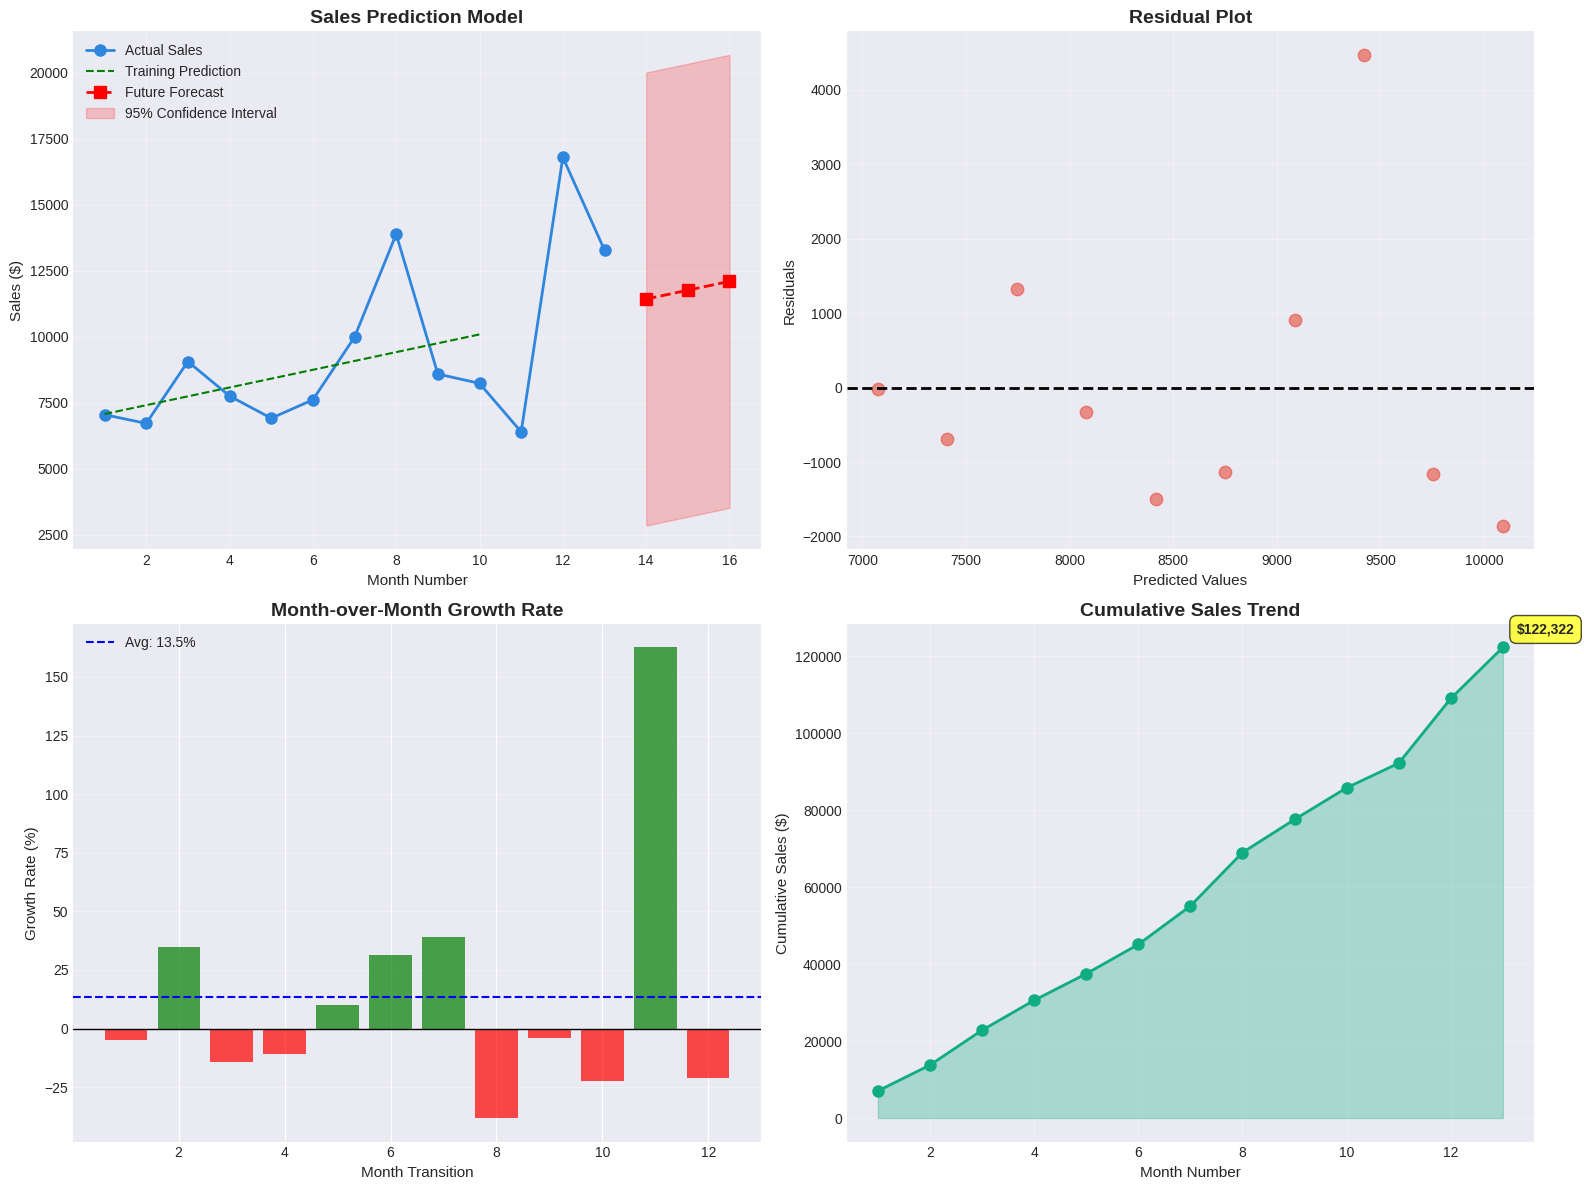


📊 7. COMPREHENSIVE SALES TRACKING DASHBOARD
----------------------------------------------------------------------


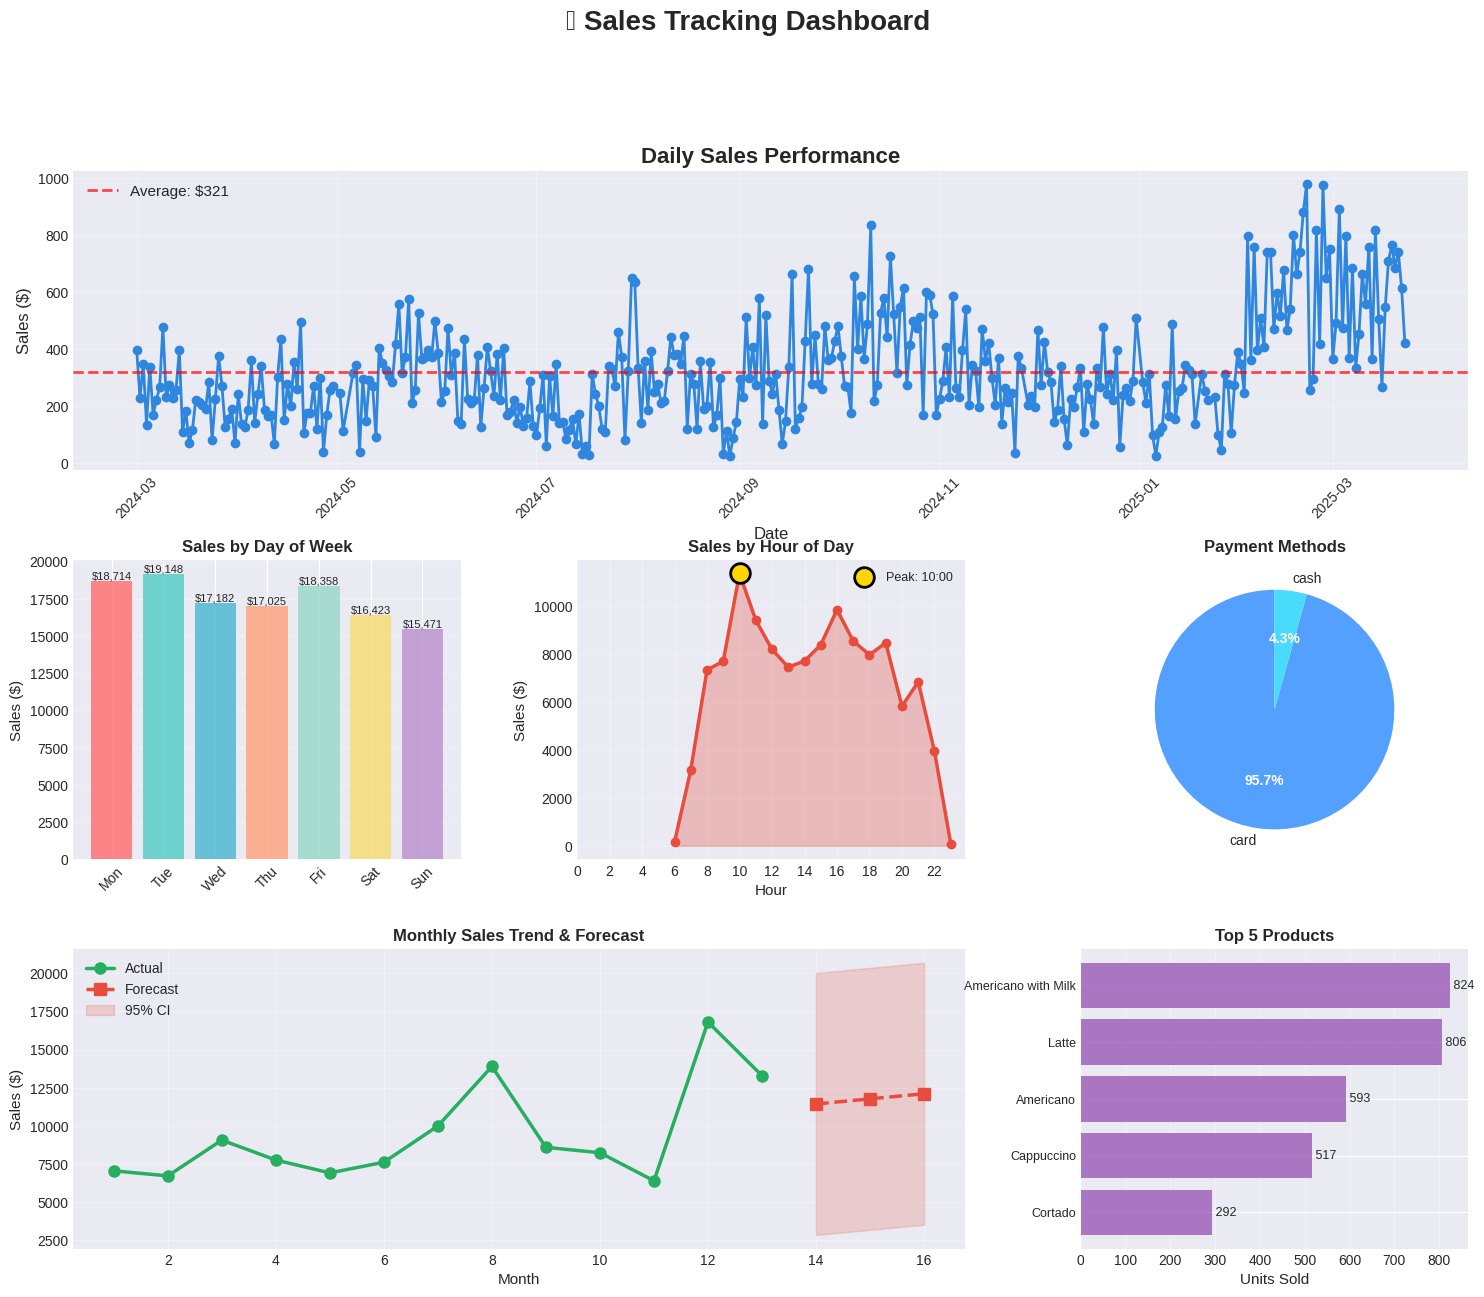


✅ Dashboard generated successfully!


In [31]:
# ============================================
# 6. SALES PREDICTION MODEL
# ============================================
print("\n" + "="*70)
print("🔮 6. SALES PREDICTION MODEL")
print("-"*70)

try:
    # Monthly aggregation
    monthly_sales = df_all.groupby('month').agg({
        'money': 'sum'
    }).reset_index()
    monthly_sales.columns = ['month', 'sales']
    monthly_sales['month_num'] = range(1, len(monthly_sales) + 1)

    print(f"\n📅 MONTHLY SALES DATA:")
    for idx, row in monthly_sales.iterrows():
        print(f"   Month {row['month_num']} ({row['month']}): ${row['sales']:,.0f}")

    # Prepare data for modeling
    X = monthly_sales[['month_num']].values
    y = monthly_sales['sales'].values

    # Train-test split
    if len(monthly_sales) > 3:
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    else:
        X_train, X_test, y_train, y_test = X, X[-1:], y, y[-1:]

    # Train Linear Regression Model
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Model evaluation
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)

    print(f"\n📊 MODEL PERFORMANCE METRICS:")
    print(f"   • Training R² Score: {r2_train:.4f}")
    print(f"   • Testing R² Score: {r2_test:.4f}")
    print(f"   • Training RMSE: ${rmse_train:,.0f}")
    print(f"   • Testing RMSE: ${rmse_test:,.0f}")
    print(f"   • Testing MAE: ${mae_test:,.0f}")
    print(f"   • Model Coefficient: {model.coef_[0]:,.2f}")
    print(f"   • Model Intercept: ${model.intercept_:,.0f}")

    # Interpretation
    if r2_test > 0.7:
        print(f"\n✓ Model shows GOOD predictive power (R² > 0.7)")
    elif r2_test > 0.5:
        print(f"\n⚠️  Model shows MODERATE predictive power (0.5 < R² < 0.7)")
    else:
        print(f"\n⚠️  Model shows WEAK predictive power (R² < 0.5)")

    # Predict next months
    next_months = 3
    future_month_nums = np.array([[len(monthly_sales) + i] for i in range(1, next_months + 1)])
    future_predictions = model.predict(future_month_nums)

    print(f"\n🔮 SALES FORECAST FOR NEXT {next_months} MONTHS:")
    for i, pred in enumerate(future_predictions, 1):
        confidence_interval = 1.96 * rmse_test  # 95% CI
        lower_bound = max(0, pred - confidence_interval)
        upper_bound = pred + confidence_interval
        print(f"   Month +{i}: ${pred:,.0f} (95% CI: ${lower_bound:,.0f} - ${upper_bound:,.0f})")

    # Growth rate analysis
    if len(monthly_sales) > 1:
        growth_rates = monthly_sales['sales'].pct_change().dropna() * 100
        avg_growth = growth_rates.mean()
        print(f"\n📈 GROWTH ANALYSIS:")
        print(f"   • Average Monthly Growth Rate: {avg_growth:.2f}%")
        print(f"   • Trend: {'Upward ↗' if model.coef_[0] > 0 else 'Downward ↘'}")

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Chart 1: Actual vs Predicted with forecast
    axes[0, 0].plot(monthly_sales['month_num'], monthly_sales['sales'],
                    marker='o', label='Actual Sales', linewidth=2, color='#2E86DE', markersize=8)
    axes[0, 0].plot(X_train, y_pred_train, 'g--', label='Training Prediction', linewidth=1.5)
    axes[0, 0].plot(future_month_nums, future_predictions,
                    marker='s', linestyle='--', label='Future Forecast', linewidth=2, color='red', markersize=8)
    axes[0, 0].fill_between(future_month_nums.flatten(),
                            future_predictions - 1.96*rmse_test,
                            future_predictions + 1.96*rmse_test,
                            alpha=0.2, color='red', label='95% Confidence Interval')
    axes[0, 0].set_title('Sales Prediction Model', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Month Number', fontsize=11)
    axes[0, 0].set_ylabel('Sales ($)', fontsize=11)
    axes[0, 0].legend(loc='best')
    axes[0, 0].grid(True, alpha=0.3)

    # Chart 2: Residuals plot
    residuals = y_train - y_pred_train
    axes[0, 1].scatter(y_pred_train, residuals, alpha=0.6, s=80, color='#E74C3C')
    axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
    axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Predicted Values', fontsize=11)
    axes[0, 1].set_ylabel('Residuals', fontsize=11)
    axes[0, 1].grid(True, alpha=0.3)

    # Chart 3: Growth rate
    if len(monthly_sales) > 1:
        colors_growth = ['green' if x > 0 else 'red' for x in growth_rates.values]
        axes[1, 0].bar(range(1, len(growth_rates)+1), growth_rates.values, color=colors_growth, alpha=0.7)
        axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
        axes[1, 0].axhline(y=avg_growth, color='blue', linestyle='--', linewidth=1.5,
                          label=f'Avg: {avg_growth:.1f}%')
        axes[1, 0].set_title('Month-over-Month Growth Rate', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Month Transition', fontsize=11)
        axes[1, 0].set_ylabel('Growth Rate (%)', fontsize=11)
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3, axis='y')

    # Chart 4: Cumulative sales
    cumulative_sales = monthly_sales['sales'].cumsum()
    axes[1, 1].plot(monthly_sales['month_num'], cumulative_sales,
                    marker='o', linewidth=2, color='#10AC84', markersize=8)
    axes[1, 1].fill_between(monthly_sales['month_num'], 0, cumulative_sales, alpha=0.3, color='#10AC84')
    axes[1, 1].set_title('Cumulative Sales Trend', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Month Number', fontsize=11)
    axes[1, 1].set_ylabel('Cumulative Sales ($)', fontsize=11)
    axes[1, 1].grid(True, alpha=0.3)

    # Add value annotation on last point
    axes[1, 1].annotate(f'${cumulative_sales.iloc[-1]:,.0f}',
                       xy=(monthly_sales['month_num'].iloc[-1], cumulative_sales.iloc[-1]),
                       xytext=(10, 10), textcoords='offset points',
                       bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                       fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Error in Sales Prediction: {str(e)}")
    import traceback
    print(traceback.format_exc())

# ============================================
# 7. COMPREHENSIVE SALES TRACKING DASHBOARD
# ============================================
print("\n" + "="*70)
print("📊 7. COMPREHENSIVE SALES TRACKING DASHBOARD")
print("-"*70)

try:
    # Find payment and product columns
    payment_col = None
    for col in ['cash_type', 'payment', 'payment_type', 'pay_type', 'payment_method', 'type']:
        if col in df_all.columns:
            payment_col = col
            break

    product_col = None
    for col in ['coffee_name', 'coffe name', 'coffee name', 'product', 'drink', 'item']:
        if col in df_all.columns:
            product_col = col
            break

    fig = plt.figure(figsize=(18, 14))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    # Chart 1: Daily sales trend (large)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(daily_sales.index, daily_sales['total_sales'], marker='o', linewidth=2, color='#2E86DE', markersize=6)
    avg_daily = daily_sales['total_sales'].mean()
    ax1.axhline(y=avg_daily, color='red', linestyle='--', alpha=0.7, linewidth=2,
                label=f'Average: ${avg_daily:,.0f}')
    ax1.set_title('Daily Sales Performance', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Sales ($)', fontsize=12)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    # Chart 2: Sales by day of week
    ax2 = fig.add_subplot(gs[1, 0])
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_sales = df_all.groupby('day_name')['money'].sum().reindex(day_order)
    colors_day = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
    bars_day = ax2.bar(range(len(day_sales)), day_sales.values, color=colors_day, alpha=0.8)
    ax2.set_title('Sales by Day of Week', fontsize=12, fontweight='bold')
    ax2.set_xticks(range(len(day_sales)))
    ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
    ax2.set_ylabel('Sales ($)', fontsize=11)
    ax2.grid(True, alpha=0.3, axis='y')

    # Add value labels
    for bar in bars_day:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}', ha='center', va='bottom', fontsize=8)

    # Chart 3: Hourly sales pattern
    ax3 = fig.add_subplot(gs[1, 1])
    hourly_sales = df_all.groupby('hour')['money'].sum()
    ax3.plot(hourly_sales.index, hourly_sales.values, marker='o', linewidth=2.5, color='#E74C3C', markersize=6)
    ax3.fill_between(hourly_sales.index, hourly_sales.values, alpha=0.3, color='#E74C3C')

    # Highlight peak hour
    peak_hour = hourly_sales.idxmax()
    ax3.scatter([peak_hour], [hourly_sales[peak_hour]], s=200, color='gold',
               edgecolors='black', linewidths=2, zorder=5, label=f'Peak: {peak_hour}:00')

    ax3.set_title('Sales by Hour of Day', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Hour', fontsize=11)
    ax3.set_ylabel('Sales ($)', fontsize=11)
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3)
    ax3.set_xticks(range(0, 24, 2))

    # Chart 4: Payment distribution
    ax4 = fig.add_subplot(gs[1, 2])
    if payment_col and payment_col in df_all.columns:
        payment_dist = df_all[payment_col].value_counts()
        wedges, texts, autotexts = ax4.pie(payment_dist.values, labels=payment_dist.index,
                                            autopct='%1.1f%%', startangle=90,
                                            colors=['#54A0FF', '#48DBFB'])
        ax4.set_title('Payment Methods', fontsize=12, fontweight='bold')

        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)
    else:
        ax4.text(0.5, 0.5, 'Payment data\nnot available', ha='center', va='center', fontsize=12)
        ax4.set_title('Payment Methods', fontsize=12, fontweight='bold')

    # Chart 5: Monthly trend with forecast
    ax5 = fig.add_subplot(gs[2, :2])
    ax5.plot(monthly_sales['month_num'], monthly_sales['sales'],
             marker='o', label='Actual', linewidth=2.5, color='#27AE60', markersize=8)
    ax5.plot(future_month_nums, future_predictions,
             marker='s', linestyle='--', label='Forecast', linewidth=2.5, color='#E74C3C', markersize=8)
    ax5.fill_between(future_month_nums.flatten(),
                     future_predictions - 1.96*rmse_test,
                     future_predictions + 1.96*rmse_test,
                     alpha=0.2, color='#E74C3C', label='95% CI')
    ax5.set_title('Monthly Sales Trend & Forecast', fontsize=12, fontweight='bold')
    ax5.set_xlabel('Month', fontsize=11)
    ax5.set_ylabel('Sales ($)', fontsize=11)
    ax5.legend(fontsize=10)
    ax5.grid(True, alpha=0.3)

    # Chart 6: Top products
    ax6 = fig.add_subplot(gs[2, 2])
    if product_col and product_col in df_all.columns:
        # Recalculate favorite_products if not exists
        if 'favorite_products' not in locals():
            favorite_products = df_all.groupby(product_col).agg({
                'money': ['sum', 'count', 'mean']
            })
            favorite_products.columns = ['Total_Revenue', 'Units_Sold', 'Avg_Price']
            favorite_products = favorite_products.sort_values('Units_Sold', ascending=False)

        top_5_products = favorite_products.head(5)['Units_Sold']
        bars_prod = ax6.barh(range(len(top_5_products)), top_5_products.values, color='#9B59B6', alpha=0.8)
        ax6.set_yticks(range(len(top_5_products)))
        ax6.set_yticklabels(top_5_products.index, fontsize=9)
        ax6.set_title('Top 5 Products', fontsize=12, fontweight='bold')
        ax6.set_xlabel('Units Sold', fontsize=11)
        ax6.invert_yaxis()
        ax6.grid(True, alpha=0.3, axis='x')

        # Add value labels
        for i, (bar, val) in enumerate(zip(bars_prod, top_5_products.values)):
            ax6.text(val, i, f' {int(val):,}', va='center', fontsize=9)
    else:
        ax6.text(0.5, 0.5, 'Product data\nnot available', ha='center', va='center', fontsize=12)
        ax6.set_title('Top 5 Products', fontsize=12, fontweight='bold')

    plt.suptitle('☕ Sales Tracking Dashboard', fontsize=20, fontweight='bold', y=0.995)
    plt.show()

    print("\n✅ Dashboard generated successfully!")

except Exception as e:
    print(f"❌ Error in Dashboard: {str(e)}")
    import traceback
    print(traceback.format_exc())

In [33]:
# ============================================
# 8. EXECUTIVE SUMMARY
# ============================================
print("\n" + "="*70)
print("📋 8. EXECUTIVE SUMMARY")
print("="*70)

try:
    # Find payment and product columns
    payment_col = None
    for col in ['cash_type', 'payment', 'payment_type', 'pay_type', 'payment_method', 'type']:
        if col in df_all.columns:
            payment_col = col
            break

    product_col = None
    for col in ['coffee_name', 'coffe name', 'coffee name', 'product', 'drink', 'item']:
        if col in df_all.columns:
            product_col = col
            break

    # Recalculate if needed
    if product_col and 'favorite_products' not in locals():
        favorite_products = df_all.groupby(product_col).agg({
            'money': ['sum', 'count', 'mean']
        })
        favorite_products.columns = ['Total_Revenue', 'Units_Sold', 'Avg_Price']
        favorite_products = favorite_products.sort_values('Units_Sold', ascending=False)

    if payment_col and 'payment_analysis' not in locals():
        payment_analysis = df_all.groupby(payment_col).agg({
            'money': ['mean', 'median', 'sum', 'count', 'std']
        })
        payment_analysis.columns = ['Avg_Transaction', 'Median_Transaction', 'Total_Revenue', 'Count', 'Std_Dev']

    # Calculate additional metrics
    total_revenue = df_all['money'].sum()
    avg_daily_sales = daily_sales['total_sales'].mean()
    avg_transaction = df_all['money'].mean()
    total_transactions = len(df_all)

    # Best and worst days
    best_day = daily_sales['total_sales'].idxmax()
    worst_day = daily_sales['total_sales'].idxmin()
    best_day_sales = daily_sales.loc[best_day, 'total_sales']
    worst_day_sales = daily_sales.loc[worst_day, 'total_sales']

    # Best performing day of week
    day_of_week_sales = df_all.groupby('day_name')['money'].sum()
    best_weekday = day_of_week_sales.idxmax()
    worst_weekday = day_of_week_sales.idxmin()

    # Best performing hour
    hourly_sales = df_all.groupby('hour')['money'].sum()
    peak_hour = hourly_sales.idxmax()
    slow_hour = hourly_sales.idxmin()

    # Product insights
    if product_col:
        top_product = favorite_products.index[0]
        top_product_units = favorite_products.iloc[0]['Units_Sold']
        top_revenue_product = favorite_products['Total_Revenue'].idxmax()
        total_products = len(favorite_products)
    else:
        top_product = 'N/A'
        top_product_units = 0
        top_revenue_product = 'N/A'
        total_products = 0

    # Payment insights
    if payment_col:
        preferred_payment = payment_analysis['Count'].idxmax()
        payment_percentage = (payment_analysis.loc[preferred_payment, 'Count'] / total_transactions * 100)
    else:
        preferred_payment = 'N/A'
        payment_percentage = 0

    # Sales trend analysis
    sales_trend = 'Positive ↗' if model.coef_[0] > 0 else 'Negative ↘'
    trend_strength = abs(model.coef_[0])

    # Forecast metrics
    next_month_forecast = future_predictions[0]
    forecast_lower = max(0, next_month_forecast - 1.96*rmse_test)
    forecast_upper = next_month_forecast + 1.96*rmse_test

    # Calculate revenue variance
    revenue_std = df_all['money'].std()
    revenue_cv = (revenue_std / avg_transaction) * 100  # Coefficient of variation

    # Print Executive Summary
    print(f"""
BUSINESS PERFORMANCE OVERVIEW:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 SALES METRICS:
   • Total Revenue: ${total_revenue:,.0f}
   • Average Daily Sales: ${avg_daily_sales:,.0f}
   • Average Transaction: ${avg_transaction:,.2f}
   • Total Transactions: {total_transactions:,}
   • Transaction Variability (CV): {revenue_cv:.1f}%

📈 GROWTH INDICATORS:
   • Sales Trend: {sales_trend} (${trend_strength:,.2f}/month)
   • Monthly Growth Rate: {avg_growth:.2f}% (average)
   • Prediction Accuracy (R²): {r2_test:.2%}
   • Model Reliability: {'High' if r2_test > 0.7 else 'Moderate' if r2_test > 0.5 else 'Low'}

🏆 TOP PERFORMERS:
   • Best Sales Day: {best_day.strftime('%Y-%m-%d') if hasattr(best_day, 'strftime') else best_day} (${best_day_sales:,.0f})
   • Worst Sales Day: {worst_day.strftime('%Y-%m-%d') if hasattr(worst_day, 'strftime') else worst_day} (${worst_day_sales:,.0f})
   • Best Weekday: {best_weekday} (${day_of_week_sales[best_weekday]:,.0f})
   • Peak Hour: {peak_hour}:00 (${hourly_sales[peak_hour]:,.0f})
   • Most Popular Product: {top_product} ({int(top_product_units):,} units)
   • Highest Revenue Product: {top_revenue_product}
   • Preferred Payment: {preferred_payment} ({payment_percentage:.1f}% of transactions)

📦 PRODUCT INSIGHTS:
   • Total Unique Products: {total_products}
   • Top 5 Products Account For: {favorite_products.head(5)['Units_Sold'].sum() / favorite_products['Units_Sold'].sum() * 100 if product_col else 0:.1f}% of sales
   • Product Concentration: {'High' if total_products > 0 and (favorite_products.head(5)['Units_Sold'].sum() / favorite_products['Units_Sold'].sum()) > 0.6 else 'Moderate'}

🔮 FORECAST (Next {len(future_predictions)} Months):
   • Month +1 Expected Sales: ${future_predictions[0]:,.0f}
   • Month +1 Confidence Range: ${forecast_lower:,.0f} - ${forecast_upper:,.0f}
   • Month +2 Expected Sales: ${future_predictions[1]:,.0f}
   • Month +3 Expected Sales: ${future_predictions[2]:,.0f}
   • Total 3-Month Forecast: ${future_predictions.sum():,.0f}

⚠️ RISK FACTORS:
   • Sales Volatility: {'High' if revenue_cv > 50 else 'Moderate' if revenue_cv > 30 else 'Low'}
   • Day-to-Day Variance: ${daily_sales['total_sales'].std():,.0f}
   • Prediction Uncertainty: ±${1.96*rmse_test:,.0f}

💡 KEY RECOMMENDATIONS:

   1. REVENUE OPTIMIZATION:
      → Focus marketing efforts on {best_weekday}s
      → Extend operations during peak hour ({peak_hour}:00)
      → Promote top product "{top_product}" to maximize volume

   2. OPERATIONAL EFFICIENCY:
      → Increase inventory for top 5 products (account for {favorite_products.head(5)['Units_Sold'].sum() / favorite_products['Units_Sold'].sum() * 100 if product_col else 0:.0f}% of sales)
      → Schedule more staff during {peak_hour}:00-{(peak_hour+2)%24}:00
      → Consider promotions on {worst_weekday}s to boost slow days

   3. PAYMENT & CUSTOMER EXPERIENCE:
      → Ensure {preferred_payment} systems are always operational
      → Monitor transaction speed during peak hours
      → Consider loyalty programs for high-frequency customers

   4. STRATEGIC PLANNING:
      → Use forecast data (${future_predictions.sum():,.0f} for next 3 months) for inventory planning
      → Prepare for {'growth' if model.coef_[0] > 0 else 'decline'} trend with appropriate staffing
      → Budget with ±${1.96*rmse_test:,.0f} confidence margin

   5. PRODUCT PORTFOLIO:
      → Consider expanding successful product lines similar to {top_product}
      → Review underperforming products for discontinuation
      → Test new products during off-peak hours

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📅 Report Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
📊 Analysis Period: {df_all['date'].min()} to {df_all['date'].max()}
🔢 Data Points Analyzed: {len(df_all):,} transactions across {len(daily_sales)} days
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

except Exception as e:
    print(f"\n❌ Error generating Executive Summary: {str(e)}")
    print(f"\nAvailable variables:")
    print(f"   - df_all columns: {df_all.columns.tolist()}")
    print(f"   - daily_sales: {'Available' if 'daily_sales' in locals() else 'Not available'}")
    print(f"   - model: {'Available' if 'model' in locals() else 'Not available'}")
    print(f"   - favorite_products: {'Available' if 'favorite_products' in locals() else 'Not available'}")
    print(f"   - payment_analysis: {'Available' if 'payment_analysis' in locals() else 'Not available'}")
    import traceback
    print(f"\n{traceback.format_exc()}")


📋 8. EXECUTIVE SUMMARY

BUSINESS PERFORMANCE OVERVIEW:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 SALES METRICS:
   • Total Revenue: $122,322
   • Average Daily Sales: $321
   • Average Transaction: $31.38
   • Total Transactions: 3,898
   • Transaction Variability (CV): 16.1%

📈 GROWTH INDICATORS:
   • Sales Trend: Positive ↗ ($335.18/month)
   • Monthly Growth Rate: 13.53% (average)
   • Prediction Accuracy (R²): -2.68%
   • Model Reliability: Low

🏆 TOP PERFORMERS:
   • Best Sales Day: 2025-02-21 ($979)
   • Worst Sales Day: 2024-08-29 ($23)
   • Best Weekday: Tuesday ($19,148)
   • Peak Hour: 10:00 ($11,358)
   • Most Popular Product: Americano with Milk (824 units)
   • Highest Revenue Product: Latte
   • Preferred Payment: card (95.7% of transactions)

📦 PRODUCT INSIGHTS:
   • Total Unique Products: 34
   • Top 5 Products Account For: 77.8% of sales
   • Product Concentration: High

🔮 FORECAST (Next 3 Months):
   • Month +1 Expected Sales: $11,432
